**Section B - Practical**

```
# This is formatted as code
```


create visualization (bar chart, pie chart) for a dataset representing the distribution product categories. sample Dataset:Category,
count
Electronics, 25
Electronics,25
clothing,35
Food 40

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
try:
    df = pd.read_csv("/content/sales_data.csv")
    print("First 5 rows of the CSV file:")
    print(df.head())
except FileNotFoundError:
    print("Error: sales_data.csv not found. Please ensure the file is in the /content/ directory.")
    exit()


First 5 rows of the CSV file:
   Product_ID   Sale_Date Sales_Rep Region  Sales_Amount  Quantity_Sold  \
0        1052  2023-02-03       Bob  North       5053.97             18   
1        1093  2023-04-21       Bob   West       4384.02             17   
2        1015  2023-09-21     David  South       4631.23             30   
3        1072  2023-08-24       Bob  South       2167.94             39   
4        1061  2023-03-24   Charlie   East       3750.20             13   

  Product_Category  Unit_Cost  Unit_Price Customer_Type  Discount  \
0        Furniture     152.75      267.22     Returning      0.09   
1        Furniture    3816.39     4209.44     Returning      0.11   
2             Food     261.56      371.40     Returning      0.20   
3         Clothing    4330.03     4467.75           New      0.02   
4      Electronics     637.37      692.71           New      0.08   

  Payment_Method Sales_Channel Region_and_Sales_Rep  
0           Cash        Online            North-Bo

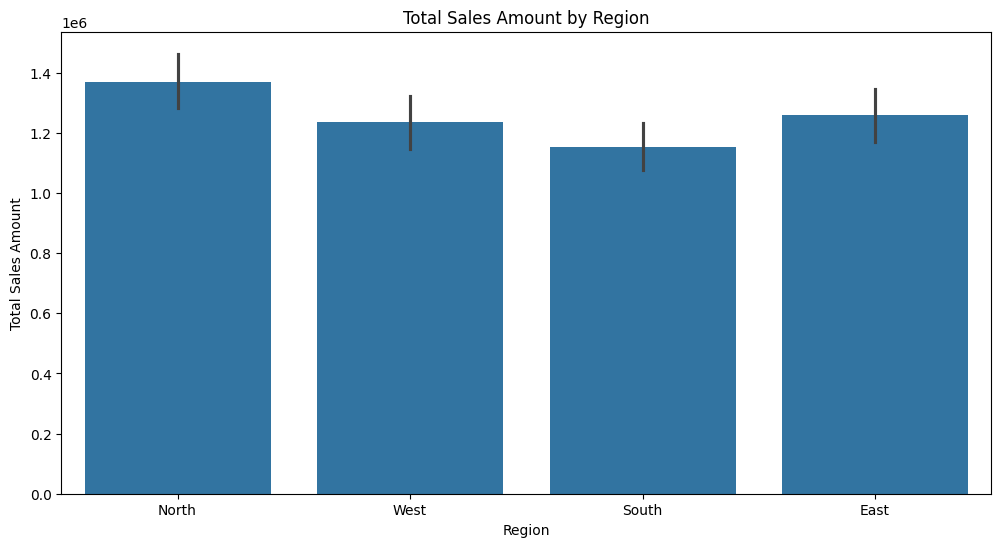

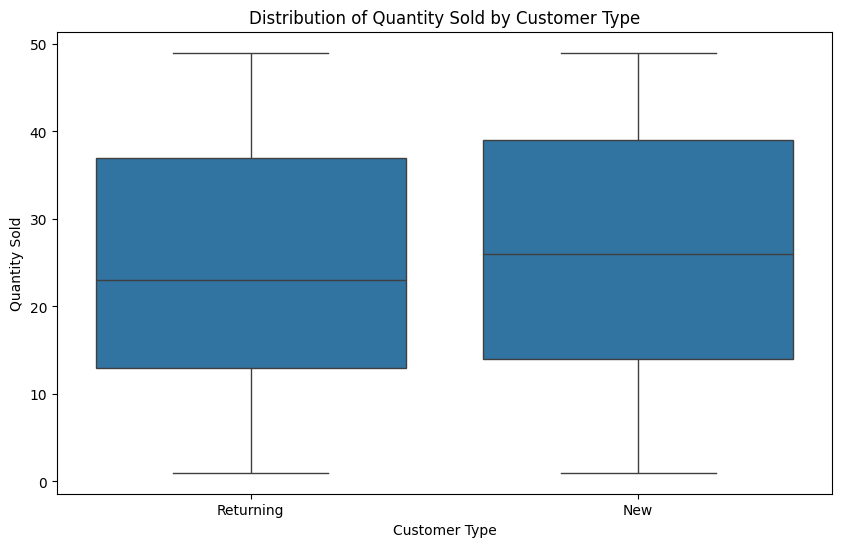

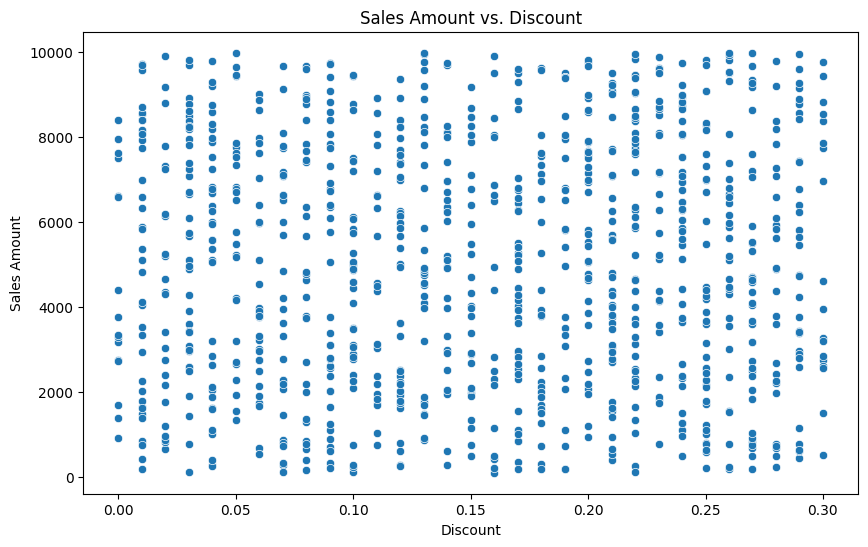

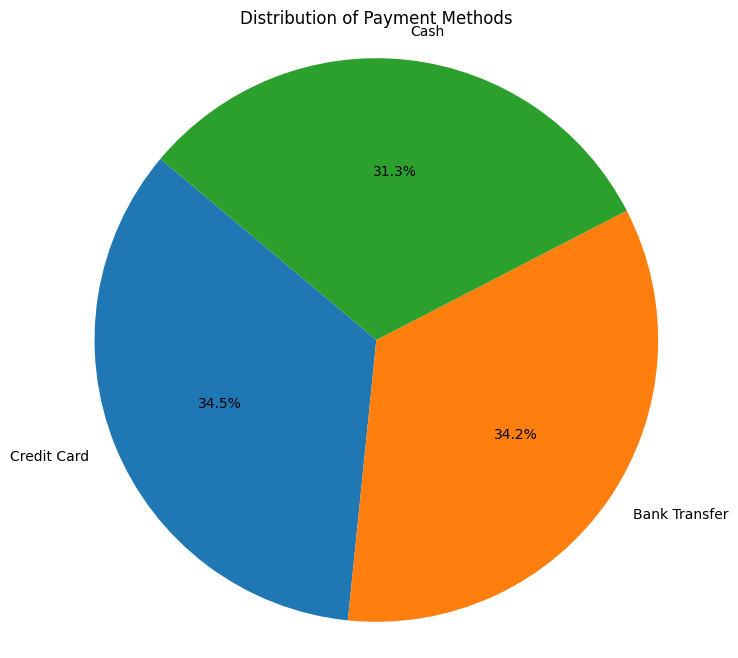

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


category_counts = df['Product_Category'].value_counts().reset_index()
category_counts.columns = ['Product_Category', 'Count']



plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Sales_Amount', data=df, estimator=sum) # Use sum to get total sales by region
plt.title('Total Sales Amount by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales Amount')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='Customer_Type', y='Quantity_Sold', data=df)
plt.title('Distribution of Quantity Sold by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Quantity Sold')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Sales_Amount', data=df)
plt.title('Sales Amount vs. Discount')
plt.xlabel('Discount')
plt.ylabel('Sales Amount')
plt.show()


plt.figure(figsize=(8, 8))
payment_counts = df['Payment_Method'].value_counts().reset_index()
payment_counts.columns = ['Payment_Method', 'Count']
plt.pie(payment_counts['Count'], labels=payment_counts['Payment_Method'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Payment Methods')
plt.axis('equal')
plt.show()

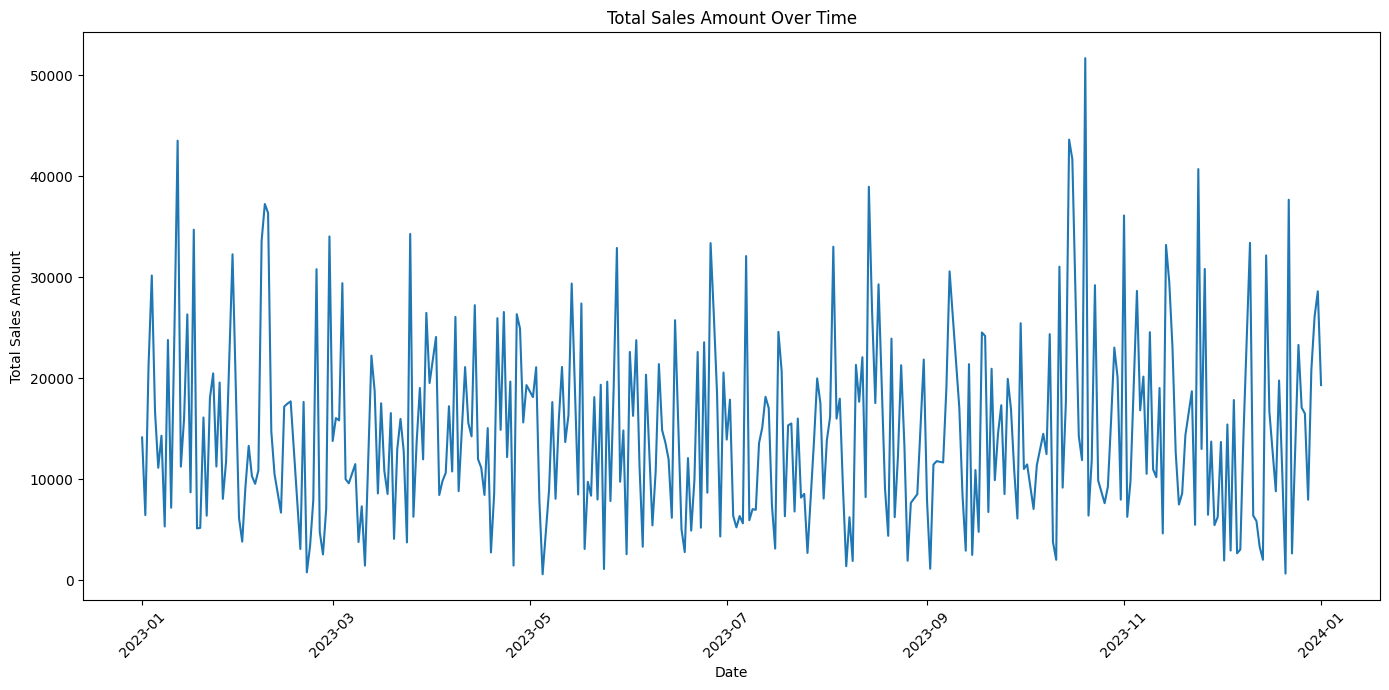

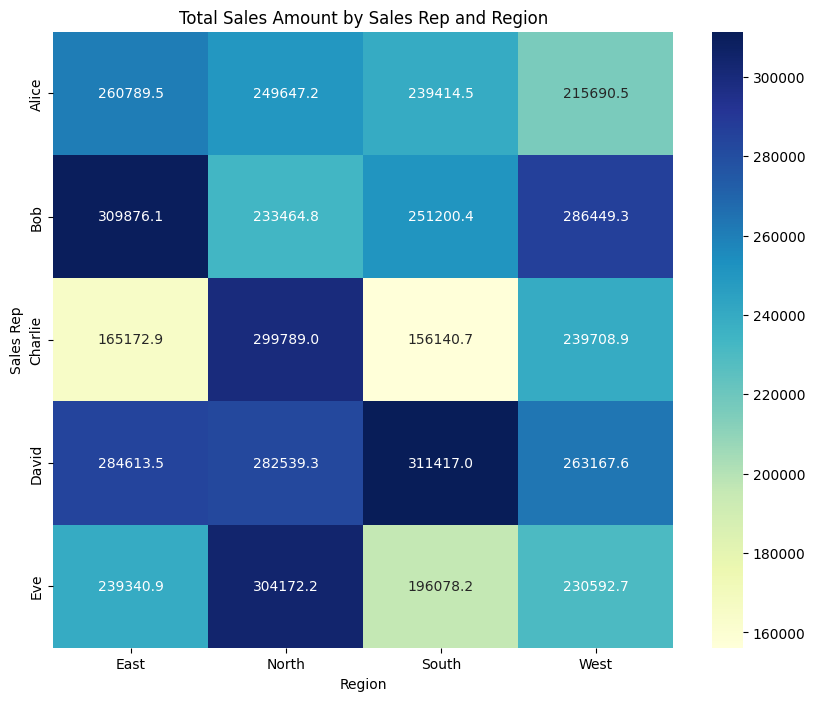

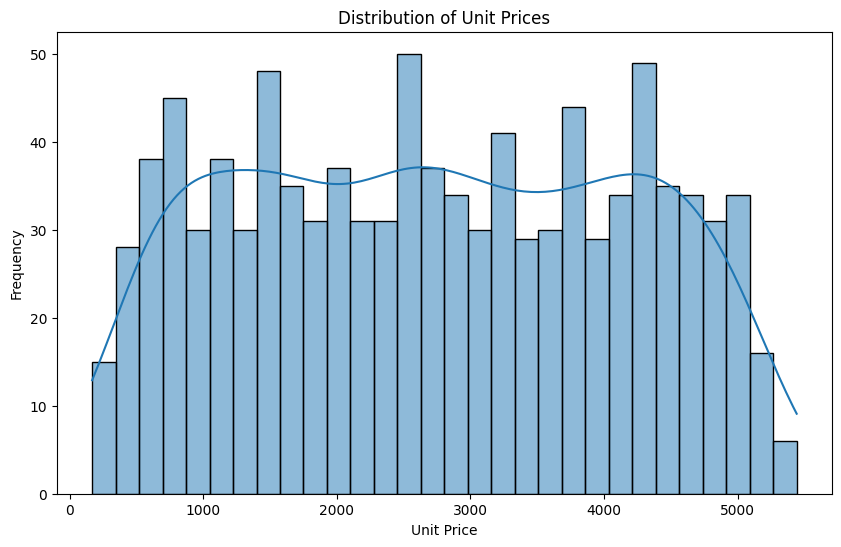

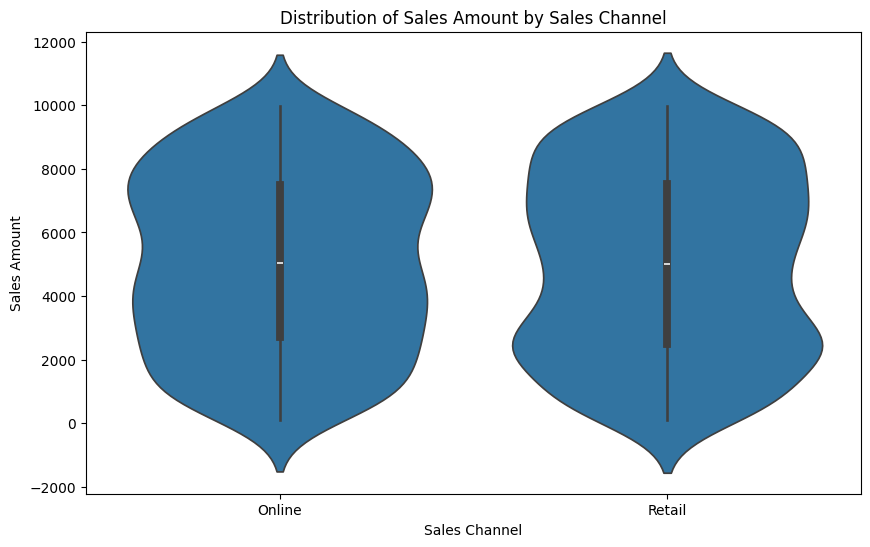

In [ ]:

df['Sale_Date'] = pd.to_datetime(df['Sale_Date'])

daily_sales = df.groupby('Sale_Date')['Sales_Amount'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(x='Sale_Date', y='Sales_Amount', data=daily_sales)
plt.title('Total Sales Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


sales_pivot = df.pivot_table(index='Sales_Rep', columns='Region', values='Sales_Amount', aggfunc=sum)

plt.figure(figsize=(10, 8))
sns.heatmap(sales_pivot, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Total Sales Amount by Sales Rep and Region')
plt.xlabel('Region')
plt.ylabel('Sales Rep')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(df['Unit_Price'], bins=30, kde=True)
plt.title('Distribution of Unit Prices')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
sns.violinplot(x='Sales_Channel', y='Sales_Amount', data=df)
plt.title('Distribution of Sales Amount by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Sales Amount')
plt.show()